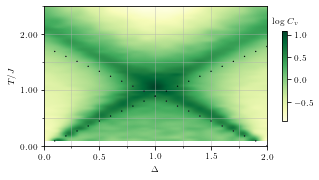

In [12]:
#!/usr/bin/env python
# coding: utf-8

from __future__ import division
import numpy as np
from numpy.random import rand
from numpy import linalg as LA
import matplotlib
import matplotlib.pyplot as plt
from scipy import interpolate
from matplotlib.patches import Arrow, Circle, Rectangle, Ellipse
from matplotlib.patches import ConnectionPatch, Polygon

from matplotlib import rc
rc('font',**{'family':'sans-serif', 'size' : 10}) #, 'sans-serif':['Arial']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

#info on phase diagram
#black dot -> Q=1/3 vortices unbind
#red dot -> Q=1 vortices unbind
#green triangles -> cv max



lambda3=0.0
#fraction=j2/j6
range_J2 = np.arange(0.0, 2.01, 0.1)

#temperature range
Tmax = 2.5
Tmax_plot = 2.5
Tmin = 0.1


fig, ax = plt.subplots(figsize = (2*2.5, 2*1.3) )
#lambda = 0 KT points
tkt = 0.89

#all_cross = [[stiff_cross_j2, '*', 'black'], [sp_heat_cross_j2, '*', 'blue'], [binder_potts_j2, 'o', 'blue']]

#plot the black dotted box of the inside part
#plt.plot([0.5, 1.5], [Tmin, Tmin], color = 'black', linestyle = '--')
#plt.plot([0.5, 1.5], [Tmax, Tmax], color = 'black', linestyle = '--')

patches_stiff = []
patches_stiff2 = []


radius = 0.015


for i in range(len(range_J2)):


    #patches_stiff.append(Circle((vals[0], vals[2]), radius=0.005, facecolor=col, edgecolor = 'black', zorder =5))
    #patches_stiff2.append(Circle((vals[0], vals[2]), radius=0.005, facecolor=col, edgecolor = 'black', zorder = 5))
    patches_stiff.append(Ellipse((range_J2[i], tkt*(2.0 - range_J2[i])), width=radius/2, height = radius, facecolor='mediumpurple', edgecolor = 'black', linewidth = 0.5, zorder = 5))
    patches_stiff2.append(Ellipse((range_J2[i], tkt*(range_J2[i])), width=radius/2, height = radius, facecolor='teal', edgecolor = 'black', linewidth = 0.5, zorder = 5))
    

range_J2 = np.array(range_J2)

N_cp = 40
Kc = 0.0


range_T = np.linspace(Tmin + 0.0001, Tmax, 60)
#print(range_T)


initial_cv_val = np.loadtxt('CV_data_pd_lambda0.txt')
#print(initial_cv_val)
gridplot_cv = np.zeros((len(range_T), len(range_J2)))
for j in range(len(range_J2)):

    #cv
    #gridplot_cv[:,j] = (final_cv_val)
    #log of cv
    gridplot_cv[:,j] = np.log(initial_cv_val[:,j])
    #print(gridplot_cv[:,j])

    #get cv_max for that size
    initial_cv_val_here = initial_cv_val[:,j]
    maxcv = range_T[np.where(initial_cv_val_here == np.max(initial_cv_val_here))[0][0]]
    
    """
    #print(maxcv)
    if range_J2[j] > 1.2:
        maxcv = list_of_everything[j][1]

    if range_J2[j] <= 1.15:
        patches_cv2.append(Ellipse((range_J2[j], maxcv), width=radius/2, height = radius, facecolor='red', edgecolor = 'black', linewidth = 0.5, zorder = 6))
        #patches_cv2.append(Circle((range_J2[j], maxcv), radius=0.005, facecolor='red', edgecolor = 'black', zorder = 6))
    else:
        #not used here
        patches_cv.append(Rectangle((range_J2[j]- 0.01, maxcv - 0.01), 0.01, 0.001, facecolor='red', edgecolor = 'black', linewidth = 0.5, zorder = 6))
        patches_cv2.append(Rectangle((range_J2[j] - 0.01, maxcv - 0.01), 0.01, 0.01, facecolor='red', edgecolor = 'black', linewidth = 0.5, zorder = 6))

    if 0.85 <= range_J2[j] <= 1.15:
        iyC.append(maxcv)

    if range_J2[j] <= 1.15:
        fP.append(maxcv)
    """


#ixB = np.array(ixB)[::-1]
#ixC = np.array(ixC)
#iyB = np.array(iyB)[::-1]
#iyC = np.array(iyC)

im = ax.imshow(gridplot_cv, interpolation='spline16', cmap='YlGn',origin='lower',    extent = [0 - 0.025, 2.0 + 0.025, 0.1 - 1/(2*59), 2.5 + 1/(2*59)])

#clb = plt.colorbar(im, shrink=0.5)
#clb.ax.tick_params(labelsize=12)
#clb.ax.set_title(r'$C_v/N$', fontsize = 12)
#clb.ax.set_title(r'$\log \; C_v$', fontsize = 12)


x1, x2, y1, y2 = 0, 2.0, 0.0, 2.5
ax.set_xlim(x1, x2)
ax.set_ylim(y1, y2)


plt.xlabel('$\Delta$', fontsize=9);
plt.ylabel('$T/J$', fontsize=9)

#ticks
major_ticks_x = np.arange(0.0, 2.0 + 0.01, 0.5)
minor_ticks_x = np.arange(0.0, 2.0 + 0.01, 0.25)
major_ticks_y = np.arange(0.0, 2.5 + 0.01, 1.0)
minor_ticks_y = np.arange(0.0, 2.5 + 0.01, 0.5)

tick_print_x = []
for elem in major_ticks_x:
    tick_print_x.append('${:.1f}$'.format(elem))

tick_print_y = []
for elem in major_ticks_y:
    tick_print_y.append('${:.2f}$'.format(elem))

ax.set_xticks(major_ticks_x)
ax.set_yticks(major_ticks_y)
#ax.set_xticklabels(tick_print_x, fontsize = 16, rotation = 310)
ax.set_xticklabels(tick_print_x, fontsize = 9)
ax.set_yticklabels(tick_print_y, fontsize = 9)
ax.set_xticks(minor_ticks_x, minor=True)
ax.set_yticks(minor_ticks_y, minor=True)
#ax.set_xticklabels(tick_print, rotation=315)
ax.grid(which='minor', alpha=0.5)
ax.grid(which='major', alpha=0.5)



"""
ax.plot(fP_x, fP, color = 'red', linewidth = 0.5)
ax.plot(fKT1_x, fKT1, color = 'mediumpurple', linewidth = 0.5)
ax.plot(fKT2_x, fKT2, color = 'teal', linewidth = 0.5)
"""

for p in patches_stiff2:
    ax.add_patch(p)

for p in patches_stiff:
    ax.add_patch(p)

    
#####
#colorbar
clb = plt.colorbar(im, shrink=0.65)
clb.ax.tick_params(labelsize=9)
# #clb.ax.set_title(r'$C_v/N$', fontsize = 12)
clb.ax.set_title(r'$\log \, C_v$', fontsize = 9)

ax.set_aspect(0.5)


plt.tight_layout()
plt.savefig('./fig-phasediagram-lambda0.png', format='png',dpi = 600, bbox_inches='tight')

plt.show()

